In [229]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas_profiling

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

import warnings
warnings.simplefilter('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [130]:
boston = datasets.load_boston()

In [135]:
df = boston.data
df = pd.DataFrame(df, columns=boston.feature_names)
y = boston.target
# print(df)
# print(y)

In [159]:
df.shape

(506, 13)

In [137]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


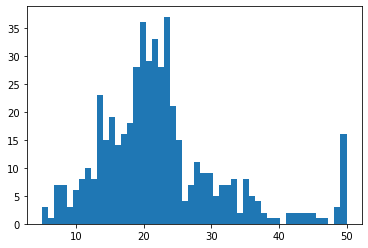

In [142]:
plt.hist(y, bins=50);

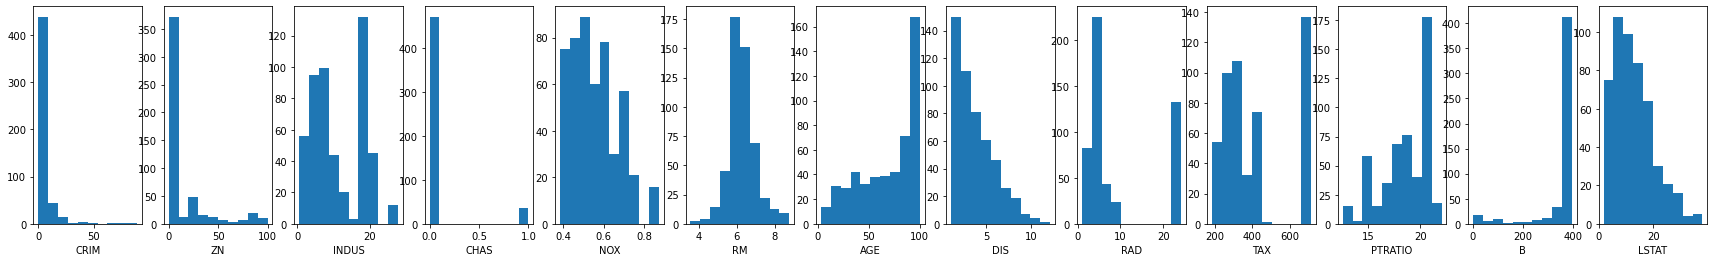

In [166]:
fig, ax = plt.subplots(ncols=13,figsize=(30,4))
for i, col in enumerate(df.columns[:13]):
    ax[i].hist(df[col])
    ax[i].set_xlabel(col)
# ax[0].set_ylabel('residual')
plt.show()

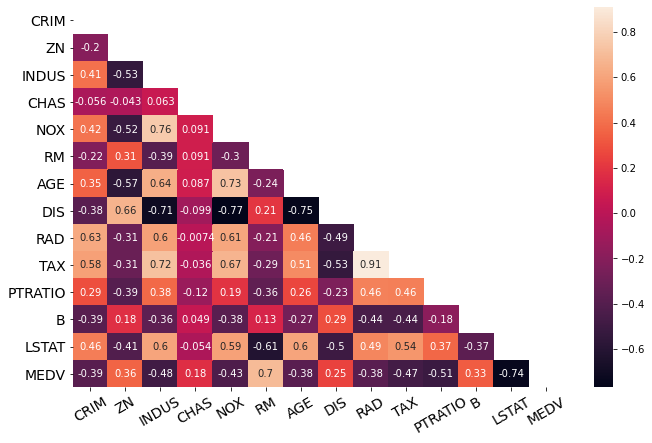

In [167]:
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(11, 7))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()


df['MEDV'] = y
correlation_heat_map(df)

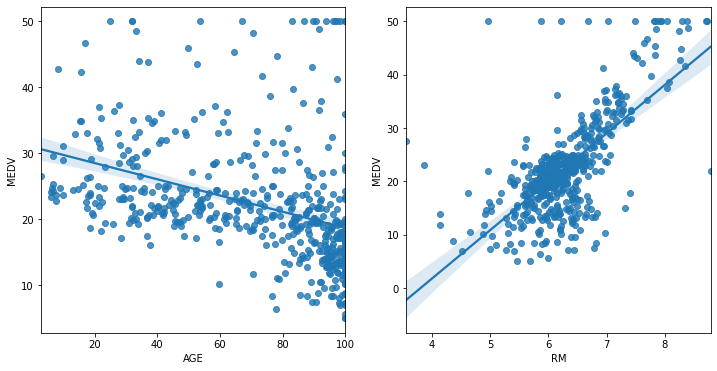

In [169]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.regplot(df['AGE'], df['MEDV'], ax=ax[0])
sns.regplot(df['RM'], df['MEDV'], ax=ax[1])
plt.show()

#### SLR, train-test split, modeling, get train and test score

50-50 split

In [193]:
x_train, x_test, y_train, y_test = \
train_test_split(df[['AGE']], y, test_size=0.5, random_state=1)

slr = LinearRegression()
slr.fit(x_train, y_train)

print('score_train: {}'.format(slr.score(x_train, y_train)))
print('score_test: {}'.format(slr.score(x_test, y_test)))

score_train: 0.1856288409345508
score_test: 0.09166672316444868


In [194]:
x_train, x_test, y_train, y_test = \
train_test_split(df[['RM']], y, test_size=0.5, random_state=1)

slr = LinearRegression()
slr.fit(x_train, y_train)

print('score_train: {}'.format(slr.score(x_train, y_train)))
print('score_test: {}'.format(slr.score(x_test, y_test)))

score_train: 0.4797499064219578
score_test: 0.4840282384906097


80-20 split

In [202]:
x_train, x_test, y_train, y_test = \
train_test_split(df[['AGE']], y, test_size=0.8, random_state=1)

slr = LinearRegression()
slr.fit(x_train, y_train)

print('score_train: {}'.format(slr.score(x_train, y_train)))
print('score_test: {}'.format(slr.score(x_test, y_test)))

score_train: 0.15761977286072304
score_test: 0.13397145867795368


In [204]:
x_train, x_test, y_train, y_test = \
train_test_split(df[['RM']], y, test_size=0.8, random_state=1)

slr = LinearRegression()
slr.fit(x_train, y_train)

print('score_train: {}'.format(slr.score(x_train, y_train)))
print('score_test: {}'.format(slr.score(x_test, y_test)))

score_train: 0.5498100437857427
score_test: 0.45759608945372177


#### K-Fold cross-validation
##### cross_val_score

In [219]:
scores = cross_val_score(slr, df[['AGE']], y, cv=5)
print('cv scores:', scores)
print('mean cv scores:', scores.mean())

cv scores: [ 0.04495477  0.05074154 -0.69817202 -0.06274528 -1.21254137]
mean cv scores: -0.3755524742970227


In [209]:
scores = cross_val_score(slr, df[['RM']], y, cv=5)
print('cv scores:', scores)
print('mean cv scores:', scores.mean())

cv scores: [ 0.70708692  0.63476138  0.50385441 -0.21594318 -1.77736913]
mean cv scores: -0.029521919957810637


##### cross_val_predict

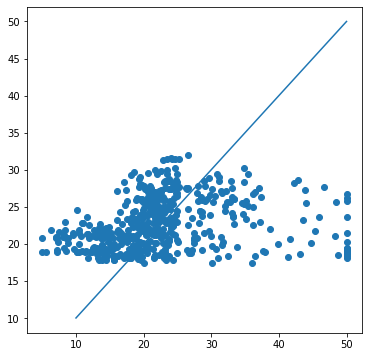

In [220]:
predictions = cross_val_predict(slr, df[['AGE']], y, cv=5)

plt.figure(figsize=(6,6))
point_1 = [10,50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

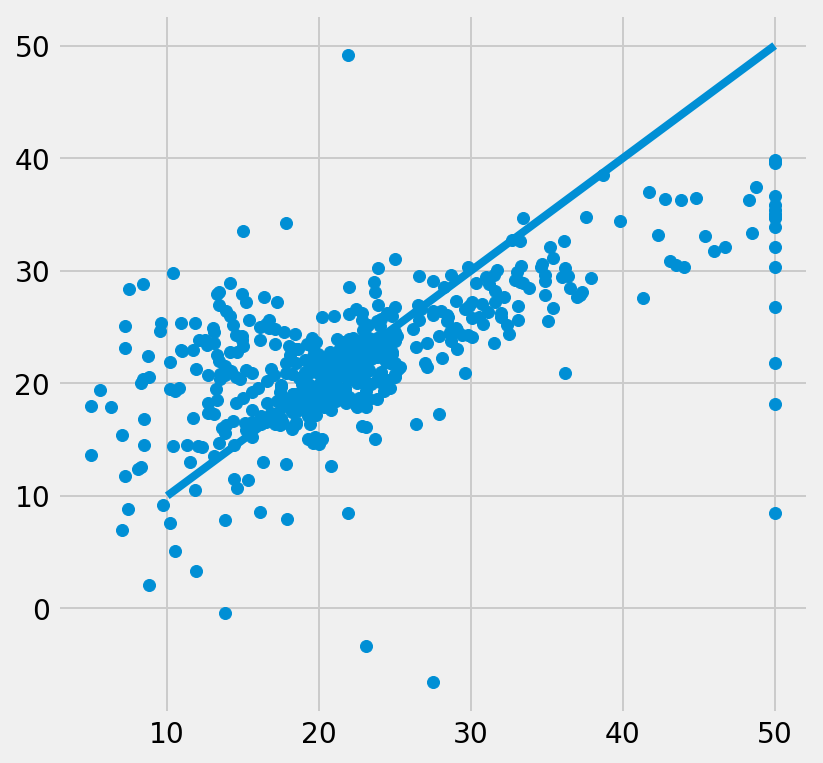

In [232]:
predictions = cross_val_predict(slr, df[['RM']], y, cv=5)

plt.figure(figsize=(6,6))
point_1 = [10,50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

In [223]:
print("Cross-Predicted R2:", metrics.r2_score(y, predictions)) #AGE

Cross-Predicted R2: 0.035849643276377186


In [214]:
print("Cross-Predicted R2:", metrics.r2_score(y, predictions)) #RM

Cross-Predicted R2: 0.3764997505934323


##### 执行上方modeling后，图像才能入下收敛，否则就是一般的散点图

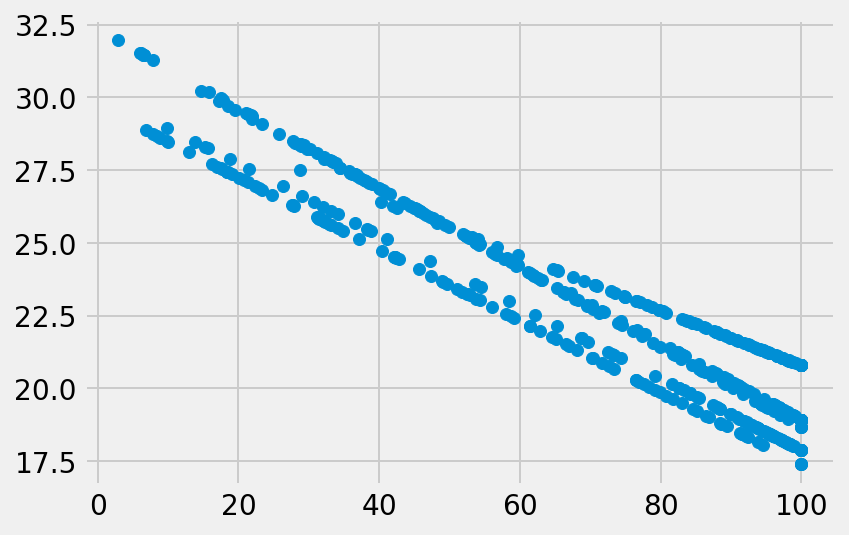

In [230]:
plt.scatter(df[['AGE']], predictions);

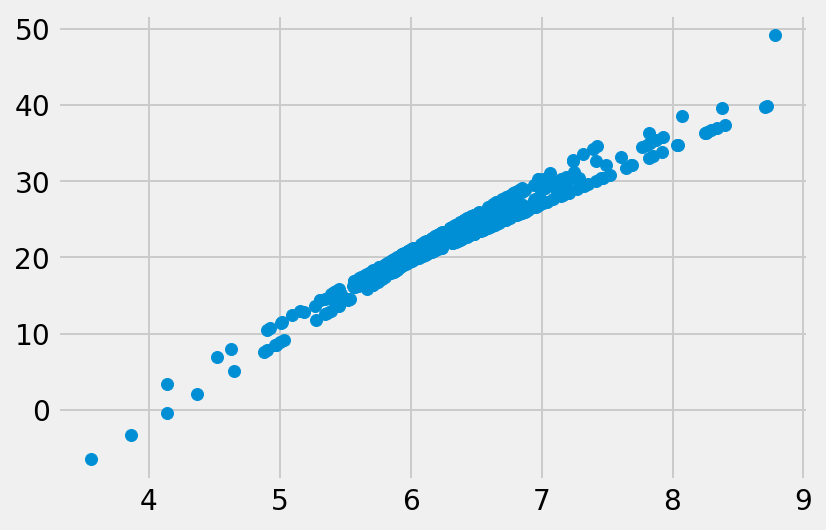

In [233]:
plt.scatter(df[['RM']], predictions);